# Utilities Consumption Study
# Weather Notebook
### Sidclay da Silva
### July 2020
---

### Introduction

This notebook is part of a study which includes analysis of self water and electricity consumption, and the relation between consumption and the variation of local temperature and relative humidity.

A separate document will be developed with the complete analysis.

---

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The source for weather data was the database of _Instituto Nacional de Meteorologia_ (INMET), the Brazilian national meteorology institut, available for download under the follwing URL https://portal.inmet.gov.br/.

INMET has several conventional and automatic meteorological stations across the country. Automatic stations record the wheater conditions hourly. For this study the data used is from automatic station __A518__ collected between January 2014 and June 2020.

Files have been downloaded per year and stored localy in ```CSV``` format. There are two variants of the file, until and after 2018, the differences are in station identification and data/time format. Anyway generally the files contain two sections,  _Station identification_ (rows 1 to 8) and _Collected data_ (header in row 9), see details below;

||**Station identification**||||
|:-:|:-|:-|:-|:-|
|**Row**|**Name**|**Data until 2018**|**Data after 2018**|**Description**|
|1|REGIÃO|SE|SE|Geographical region|
|2|UF|MG|MG|Federation state|
|**3**|**ESTAÇÃO**|**JUIZ DE FORA**|**JUIZ DE FORA**|**Station name / location**|
|**4**|**CODIGO (WMO)**|**A518**|**A518**|**Station id**|
|5|LATITUDE|-21,76999999|-21,769965|Station latitude|
|6|LONGITUDE|-43,36416666|-43,364329|Station longitude|
|7|ALTITUDE|950|936,88|Station altitude (m)|
|8|DATA DE FUNDAÇÃO|2007-05-26|26/05/07|Station foundation date|

||**Data description**|||
|--:|:--|:--|:--|
|**Column**|**Name**|**Data type**|**Description**|
|**0**|**DATA**|**```string```**|**Date in format *YYYY-MM-DD* until 2018, and *YYYY/MM/DD* after 2018**|
|**1**|**HORA UTC**|**```string```**|**Time in format *HH:MM* until 2018, and *HHMM UTC* after 2018**|
|2|PRECIPITAÇÃO TOTAL HORARIA|```float```|Total rain (mm)|
|3|PRESSAO ATMOSFERICA HORARIA|```float```|Atmospheric pressure (mB)|
|4|PRESSÃO ATMOSFERICA MAX HORA ANT|```float```|Maximal atmospheric pressure during previous hour (mB)|
|5|PRESSÃO ATMOSFERICA MIN HORA ANT|```float```|Minimal atmospheric pressure during previous hour (mB)|
|6|RADIACAO GLOBAL|```float```|Global radiation (W/m<sup>2</sup>)|
|**7**|**TEMPERATURA HORARIA**|**```float```**|**Temperature (ºC)**|
|8|TEMPERATURA PONTO DE ORVALHO|```float```|Dew point temperature (ºC)|
|**9**|**TEMPERATURA MAX HORA ANT**|**```float```**|**Maximal temperature during previous hour (ºC)**|
|**10**|**TEMPERATURA MIN HORA ANT**|**```float```**|**Minimal temperature during previous hour (ºC)**|
|11|TEMPERATURA PONTO DE ORVALHO MAX HORA ANT|```float```|Maximal dew point temperature during prevous hour(ºC)|
|12|TEMPERATURA PONTO DE ORVALHO MIN HORA ANT|```float```|Minimal dew point temperature during prevous hour(ºC)|
|**13**|**UMIDADE REL MAX HORA ANT**|**```integer```**|**Maximal relative humidity during previous hour (%)**|
|**14**|**UMIDADE REL MIN HORA ANT**|**```integer```**|**Minimal relative humidity during previous hour (%)**|
|**15**|**UMIDADE REL HORARIA**|**```integer```**|**Relative humidity (%)**|
|16|VENTO DIREÇÃO HORARIA| ```integer```|Wind direction (º)|
|17|VENTO RAJADA MAXIMA| ```float```|Maximal wind gust (m/s)|
|18|VENTO VELOCIDADE HORARIA| ```float```|Wind speed (m/s)|

Read data from ```CSV``` file. The ```CSV``` files will be loaded in a loop to a temporary dataframe and only required columns will be stored in a unique dataframe. Required columns are;

* **0**: date
* **1**: time
* **7**: temperature
* **9**: maximal temperature during previous hour
* **10**: minimal temperature during previous hour
* **13**: maximal relative humidity during previous hour
* **14**: minimal relative humidity during previous hour
* **15**: relative humidity

In [2]:
# Define columns names
cnames = ['date','time_utc','rain','atm_pressure','atm_pressure_max','atm_pressure_min',
          'global_radiation','temp','dew_temp','temp_max','temp_min','dew_temp_max',
          'dew_temp_min','rel_humidity_max','rel_humidity_min','rel_humidity',
          'wind_direction','wind_gust_max','wind_speed']

# create a years list
years=list(np.arange(2014, 2021, 1))

# run a loop through years
for i, y in enumerate(years):
    # read CSV file from local folder
    df_temp = pd.read_csv('./Data_source/Data_INMET_SE_MG_A518_{}.csv'.format(str(y)),
                          sep=';', header=None, names=cnames, skiprows=9, index_col=False, parse_dates=[0])

    # for the first run create the dataframe
    if i == 0:
        df_weather = df_temp.iloc[:,[0,1,7,10,9,15,14,13]]
    else:
        df_weather = pd.concat([df_weather, df_temp.iloc[:,[0,1,7,10,9,15,14,13]]], ignore_index=True)

df_weather

,date,time_utc,temp,temp_min,temp_max,rel_humidity,rel_humidity_min,rel_humidity_max
0,2014-01-01,00:00,"22,9","22,7","23,1",78.0,78.0,81.0
1,2014-01-01,01:00,23,"22,8","23,5",76.0,72.0,78.0
2,2014-01-01,02:00,"22,6","22,6","23,1",80.0,75.0,80.0
3,2014-01-01,03:00,"22,4","22,2","22,6",82.0,80.0,84.0
4,2014-01-01,04:00,"22,1",22,"22,7",84.0,80.0,85.0
...,...,...,...,...,...,...,...,...
56947,2020-06-30,1900 UTC,"19,4","19,2",20,74.0,72.0,75.0
56948,2020-06-30,2000 UTC,19,19,"19,5",76.0,73.0,76.0
56949,2020-06-30,2100 UTC,"18,4","18,3",19,78.0,76.0,78.0
56950,2020-06-30,2200 UTC,"17,7","17,7","18,4",80.0,78.0,80.0


Check if the number of observations match to the expected. The number of days should be multiplied by the number of daily records, in this case 24. Between 2014 and 2019 there are 2 leap years (366 days) and 4 regular years (365 days), for 2020 there are 181 days from January to June.

In [3]:
# calculate expected number of observations
print('Expected number of observations is {}'.format(((2 * 366) + (4 * 365) + 181) * 24))

Expected number of observations is 56952


Remove the temporary dataframe frmo memory.

In [4]:
# remove dataframe from memory
del df_temp

Check the dataframe datatypes.

In [5]:
df_weather.dtypes

date                datetime64[ns]
time_utc                    object
temp                        object
temp_min                    object
temp_max                    object
rel_humidity               float64
rel_humidity_min           float64
rel_humidity_max           float64
dtype: object

Column *date* has been forced to ```datetime``` format during ```CSV``` reading.

Column *time_utc* has been loaded as object, because it contains a mix of characters and numbers. Only the **hour** portion of it is required, minutes and everything else can be removed. The first two left positions will be kept and converted to ```integer```.

The three *temperature* columns should be converted from ```object``` to ```float```, but their content is in Brazilian standard, having comma as decimal separator, first it will be replaced and then converted.

The three *relative humidity* columns are originally ```integer```, but they have been loaded as ```float```, they will be kept as they are.

In [6]:
# replace data in time_utc column
df_weather['time_utc'] = df_weather['time_utc'].str.slice(start=0, stop=2)

# replace data in temperature columns
df_weather['temp'] = df_weather['temp'].str.replace(',', '.')
df_weather['temp_min'] = df_weather['temp_min'].str.replace(',', '.')
df_weather['temp_max'] = df_weather['temp_max'].str.replace(',', '.')

# convert dataframe datatypes
df_weather = df_weather.astype({'time_utc': 'int32',
                                'temp': 'float64',
                                'temp_min': 'float64',
                                'temp_max': 'float64',})

df_weather

,date,time_utc,temp,temp_min,temp_max,rel_humidity,rel_humidity_min,rel_humidity_max
0,2014-01-01,0,22.9,22.7,23.1,78.0,78.0,81.0
1,2014-01-01,1,23.0,22.8,23.5,76.0,72.0,78.0
2,2014-01-01,2,22.6,22.6,23.1,80.0,75.0,80.0
3,2014-01-01,3,22.4,22.2,22.6,82.0,80.0,84.0
4,2014-01-01,4,22.1,22.0,22.7,84.0,80.0,85.0
...,...,...,...,...,...,...,...,...
56947,2020-06-30,19,19.4,19.2,20.0,74.0,72.0,75.0
56948,2020-06-30,20,19.0,19.0,19.5,76.0,73.0,76.0
56949,2020-06-30,21,18.4,18.3,19.0,78.0,76.0,78.0
56950,2020-06-30,22,17.7,17.7,18.4,80.0,78.0,80.0


Check dataframe statistics.

In [7]:
#check dataframe statistics
df_weather.describe()

,time_utc,temp,temp_min,temp_max,rel_humidity,rel_humidity_min,rel_humidity_max
count,56952.000000,56211.000000,56194.000000,56194.000000,56211.000000,56194.000000,56194.000000
mean,11.500000,18.214583,16.840775,17.856862,69.650086,66.146190,70.810211
std,6.922247,111.863003,146.428774,146.453964,309.721488,326.737932,326.798035
min,0.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
25%,5.750000,16.700000,16.300000,17.000000,68.000000,65.000000,72.000000
50%,11.500000,19.200000,18.800000,19.700000,83.000000,80.000000,85.000000
75%,17.250000,22.000000,21.400000,22.700000,93.000000,91.000000,94.000000
max,23.000000,34.700000,33.200000,35.000000,100.000000,99.000000,100.000000


The _count_ statistic shows different figures for each of the columns and there are observations with value **-9999**, what can be considered to be missing values as well. Chech the observations with missing values, *-9999* and *NaN*, for column *temp*.

In [8]:
df_weather[(df_weather['temp']==-9999) | df_weather['temp'].isnull()]

,date,time_utc,temp,temp_min,temp_max,rel_humidity,rel_humidity_min,rel_humidity_max
9281,2015-01-22,17,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
42923,2018-11-24,11,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
42924,2018-11-24,12,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
42925,2018-11-24,13,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
42926,2018-11-24,14,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...
46300,2019-04-14,4,NaN,NaN,NaN,NaN,NaN,NaN
46304,2019-04-14,8,NaN,NaN,NaN,NaN,NaN,NaN
46306,2019-04-14,10,NaN,NaN,NaN,NaN,NaN,NaN
46322,2019-04-15,2,NaN,NaN,NaN,NaN,NaN,NaN


Check the number observations with missing values for each column.

In [9]:
# print the number of missing values for each column (2 to -1)
for i in range(2, df_weather.shape[1]):
    vnum = df_weather[(df_weather.iloc[:,i]==-9999) | (df_weather.iloc[:,i].isnull())].shape[0]
    print('{} missing values in column {} ({:.2%})'.format(vnum, df_weather.columns[i], vnum/df_weather.shape[0]))

748 missing values in column temp (1.31%)
770 missing values in column temp_min (1.35%)
770 missing values in column temp_max (1.35%)
794 missing values in column rel_humidity (1.39%)
817 missing values in column rel_humidity_min (1.43%)
817 missing values in column rel_humidity_max (1.43%)


There are some observations with missing values, but they are in very a low rate, should not be an issue. Missing values will be replaced by the mean calculated from the same date and time of the remaining years.

In [10]:
# define a function to return the mean
def calculate_mean(m, d, t, col_):
    cm = df_weather[(df_weather['date'].dt.month==m) & 
                   (df_weather['date'].dt.day==d) & 
                   (df_weather['time_utc']==t) & 
                   (df_weather[col_]!=-9999)][col_].mean()
    return round(cm,1)

# use apply to call the defined function when value is missing
for i in range(2, df_weather.shape[1]):
    df_weather.iloc[:,i] = df_weather.apply(lambda x : calculate_mean(x.date.month, x.date.day, x.time_utc, x.index[i]) 
                                            if (np.isnan(x[i]) or x[i]==-9999) else x[i], axis=1)

print('Missing values replaced.')

Missing values replaced.


Check dataframe statistics again.

In [11]:
#check dataframe statistics
df_weather.describe()

,time_utc,temp,temp_min,temp_max,rel_humidity,rel_humidity_min,rel_humidity_max
count,56952.000000,56952.000000,56952.000000,56952.000000,56952.000000,56952.000000,56952.000000
mean,11.500000,19.482771,19.001689,20.017200,79.192069,76.765764,81.431679
std,6.922247,3.934341,3.747882,4.131531,15.725555,16.628299,14.736559
min,0.000000,7.300000,7.200000,7.400000,19.000000,17.000000,22.000000
25%,5.750000,16.700000,16.400000,17.100000,68.000000,65.000000,72.000000
50%,11.500000,19.200000,18.900000,19.700000,83.000000,80.000000,86.000000
75%,17.250000,22.000000,21.400000,22.700000,93.000000,91.000000,94.000000
max,23.000000,34.700000,33.200000,35.000000,100.000000,99.000000,100.000000


The mean temperature for the whole period is **19.48ºC**, ranging from **7.20ºC** to **35.00ºC**, what is a wide range. Relativy humidity has a quite high mean, typical for the location, **79.19%**, but also with very low minimum of **17.00%**. Standard deviation for relativy humidity is also somehow high, **15.72%**, what indicates a high variation along the year.

Summarize the dataframe by date and period of the day, as following;

* **date**: group data
* **time_utc**: group data in four different time periods of the day: $[0,6[$; $[6,12[$; $[12,18[$; $[18,24[$
* **temp**: calculate mean
* **temp_min**: return minimum value
* **temp_max**: return maximum value
* **rel_humidity**: calculate mean
* **rel_humidity_min**: return minimum value
* **rel_humidity_max**: return maximum value

Copy dataframe to a new object and convert *time_utc* to *day_period* using following labels;

* **0** for $[ 0 , 6 [$
* **1** for $[ 6 , 12 [$
* **2** for $[ 12 , 18 [$
* **3** for $[ 18 , 24 [$

In [12]:
# define a function to return the period of the day
def day_period(t):
    if t < 6:
        return 0
    elif t < 12:
        return 1
    elif t < 18:
        return 2
    else:
        return 3

# copy datafrme to a new object
df_weatherperiod = df_weather.copy()
    
# use apply to convert time_utc
df_weatherperiod['time_utc'] = df_weatherperiod['time_utc'].apply(lambda x : day_period(x))

# rename column
df_weatherperiod = df_weatherperiod.rename(columns={'time_utc':'day_period'})

print('Periods of the day are {}'.format(df_weatherperiod['day_period'].unique()))

Periods of the day are [0 1 2 3]


Group dataframe by *date* and *day_period*.

In [13]:
# create a grouped dataframe
df_weatherperiod = df_weatherperiod.groupby(['date','day_period']).\
                    agg(temp_mean = pd.NamedAgg(column='temp', aggfunc=np.mean),
                        temp_min = pd.NamedAgg(column='temp_min', aggfunc='min'),
                        temp_max = pd.NamedAgg(column='temp_max', aggfunc='max'),
                        rel_humidity_mean = pd.NamedAgg(column='rel_humidity', aggfunc=np.mean),
                        rel_humidity_min = pd.NamedAgg(column='rel_humidity_min', aggfunc='min'),
                        rel_humidity_max = pd.NamedAgg(column='rel_humidity_max', aggfunc='max')).\
                    reset_index()

df_weatherperiod

,date,day_period,temp_mean,temp_min,temp_max,rel_humidity_mean,rel_humidity_min,rel_humidity_max
0,2014-01-01,0,22.483333,21.7,23.5,80.500000,72.0,85.0
1,2014-01-01,1,21.733333,20.7,24.1,84.000000,70.0,91.0
2,2014-01-01,2,28.950000,24.1,31.5,55.833333,43.0,74.0
3,2014-01-01,3,24.866667,22.9,30.9,71.166667,48.0,81.0
4,2014-01-02,0,20.066667,18.4,23.9,90.666667,68.0,97.0
...,...,...,...,...,...,...,...,...
9487,2020-06-29,3,15.616667,14.3,19.0,86.666667,72.0,94.0
9488,2020-06-30,0,13.850000,13.3,14.7,96.666667,93.0,98.0
9489,2020-06-30,1,13.433333,13.2,13.8,98.500000,98.0,99.0
9490,2020-06-30,2,17.000000,13.8,21.2,85.833333,67.0,99.0


Reduce decimal positions for *temp_mean* and *rel_humidity_mean*

In [14]:
# reduce decimal positions
df_weatherperiod['temp_mean'] = round(df_weatherperiod['temp_mean'],1)
df_weatherperiod['rel_humidity_mean'] = round(df_weatherperiod['rel_humidity_mean'],1)

df_weatherperiod

,date,day_period,temp_mean,temp_min,temp_max,rel_humidity_mean,rel_humidity_min,rel_humidity_max
0,2014-01-01,0,22.5,21.7,23.5,80.5,72.0,85.0
1,2014-01-01,1,21.7,20.7,24.1,84.0,70.0,91.0
2,2014-01-01,2,29.0,24.1,31.5,55.8,43.0,74.0
3,2014-01-01,3,24.9,22.9,30.9,71.2,48.0,81.0
4,2014-01-02,0,20.1,18.4,23.9,90.7,68.0,97.0
...,...,...,...,...,...,...,...,...
9487,2020-06-29,3,15.6,14.3,19.0,86.7,72.0,94.0
9488,2020-06-30,0,13.8,13.3,14.7,96.7,93.0,98.0
9489,2020-06-30,1,13.4,13.2,13.8,98.5,98.0,99.0
9490,2020-06-30,2,17.0,13.8,21.2,85.8,67.0,99.0


Check temperature variation between periods of the day by month using bar plot.

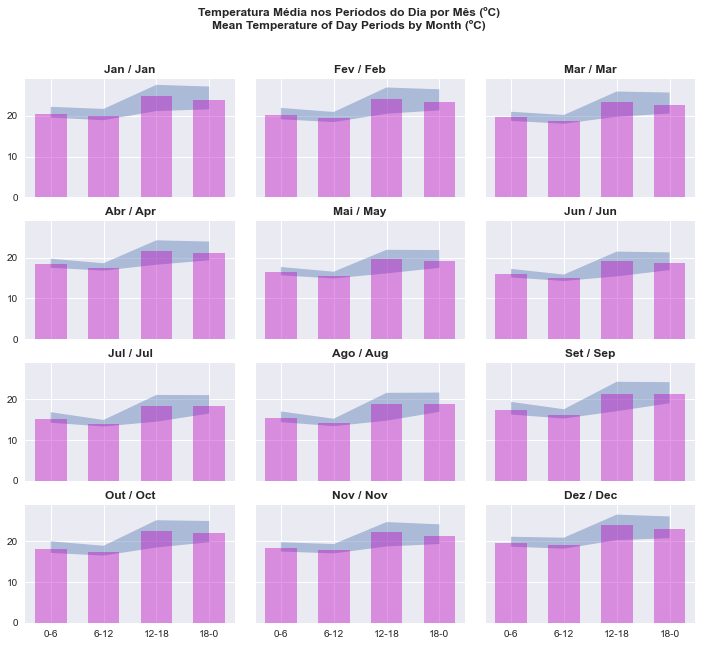

In [15]:
# define a dictionary for months
months = {'Jan / Jan':1, 'Fev / Feb':2, 'Mar / Mar':3, 'Abr / Apr':4, 'Mai / May':5, 'Jun / Jun':6,
          'Jul / Jul':7, 'Ago / Aug':8, 'Set / Sep':9, 'Out / Oct':10, 'Nov / Nov':11, 'Dez / Dec':12}

# define plot style
plt.style.use('seaborn')

# define axis label size
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# create the plot figure
fig, axs = plt.subplots(4, 3, sharex=True, sharey=True, figsize=(12,10), gridspec_kw={'hspace':0.2,'wspace':0.1})
fig.suptitle('Temperatura Média nos Períodos do Dia por Mês (ºC)\nMean Temperature of Day Periods by Month (ºC)',
             fontweight=900)

# run a loop through axes and months
for ax, m in zip(axs.flatten(), months):
    # select data
    df_plttmp = df_weatherperiod[df_weatherperiod['date'].dt.month==months[m]].\
                groupby([df_weatherperiod['date'].dt.month, 'day_period']).mean().reset_index()

    # create plot
    ax.bar(df_plttmp['day_period'], df_plttmp['temp_mean'], width=0.6, color='m', alpha=0.4)
    ax.fill_between(df_plttmp['day_period'], df_plttmp['temp_min'], df_plttmp['temp_max'], alpha=0.4)
    ax.set_title(m, fontweight=550)

# define x-ticks
plt.xticks(df_plttmp['day_period'].unique(), ['0-6','6-12','12-18','18-0'])

# show plot
plt.show()

Check relative humidity variation between periods of the day by month using bar plot.

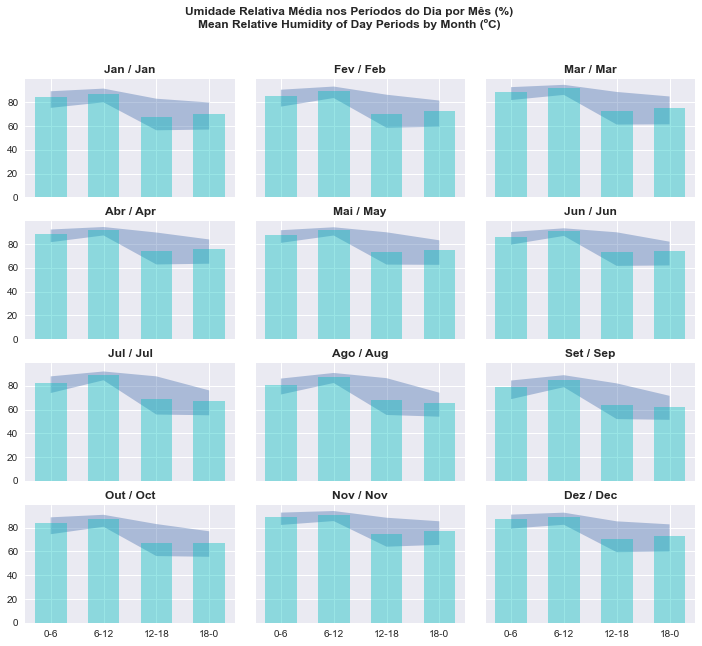

In [16]:
# create the plot figure
fig, axs = plt.subplots(4, 3, sharex=True, sharey=True, figsize=(12,10), gridspec_kw={'hspace':0.2,'wspace':0.1})
fig.suptitle('Umidade Relativa Média nos Períodos do Dia por Mês (%)\nMean Relative Humidity of Day Periods by Month (ºC)',
             fontweight=900)

# run a loop through axes and months
for ax, m in zip(axs.flatten(), months):
    # select data
    df_plttmp = df_weatherperiod[df_weatherperiod['date'].dt.month==months[m]].\
                groupby([df_weatherperiod['date'].dt.month, 'day_period']).mean().reset_index()

    # create plot
    ax.bar(df_plttmp['day_period'], df_plttmp['rel_humidity_mean'], width=0.6, color='c', alpha=0.4)
    ax.fill_between(df_plttmp['day_period'], df_plttmp['rel_humidity_min'], df_plttmp['rel_humidity_max'], alpha=0.4)
    ax.set_title(m, fontweight=550)

# define x-ticks
plt.xticks(df_plttmp['day_period'].unique(), ['0-6','6-12','12-18','18-0'])

# show plot
plt.show()

Summarize original dataframe by date, as following;

* **date**: group data
* **time_utc**: drop column
* **temp**: calculate mean
* **temp_min**: return minimum value
* **temp_max**: return maximum value
* **rel_humidity**: calculate mean
* **rel_humidity_min**: return minimum value
* **rel_humidity_max**: return maximum value

Copy dataframe to a new object and group it.

In [17]:
# copy datafrme to a new object
df_weatherday = df_weather.copy()
    
# create a grouped dataframe
df_weatherday = df_weatherday.groupby('date').\
                    agg(temp_mean = pd.NamedAgg(column='temp', aggfunc=np.mean),
                        temp_min = pd.NamedAgg(column='temp_min', aggfunc='min'),
                        temp_max = pd.NamedAgg(column='temp_max', aggfunc='max'),
                        rel_humidity_mean = pd.NamedAgg(column='rel_humidity', aggfunc=np.mean),
                        rel_humidity_min = pd.NamedAgg(column='rel_humidity_min', aggfunc='min'),
                        rel_humidity_max = pd.NamedAgg(column='rel_humidity_max', aggfunc='max')).\
                    reset_index()

# reduce decimal positions
df_weatherday['temp_mean'] = round(df_weatherday['temp_mean'],1)
df_weatherday['rel_humidity_mean'] = round(df_weatherday['rel_humidity_mean'],1)

df_weatherday

,date,temp_mean,temp_min,temp_max,rel_humidity_mean,rel_humidity_min,rel_humidity_max
0,2014-01-01,24.5,20.7,31.5,72.9,43.0,91.0
1,2014-01-02,23.6,18.1,30.0,80.0,51.0,97.0
2,2014-01-03,25.7,21.4,31.1,71.6,41.0,91.0
3,2014-01-04,25.4,21.4,31.2,70.2,45.0,90.0
4,2014-01-05,23.7,20.4,28.5,73.3,41.0,96.0
...,...,...,...,...,...,...,...
2368,2020-06-26,18.4,14.3,23.7,75.3,56.0,88.0
2369,2020-06-27,18.0,14.4,25.0,76.6,35.0,97.0
2370,2020-06-28,15.7,12.5,20.7,81.9,57.0,98.0
2371,2020-06-29,14.8,13.1,19.0,90.9,72.0,98.0


Check daily temperature variation by month, using bar plot.

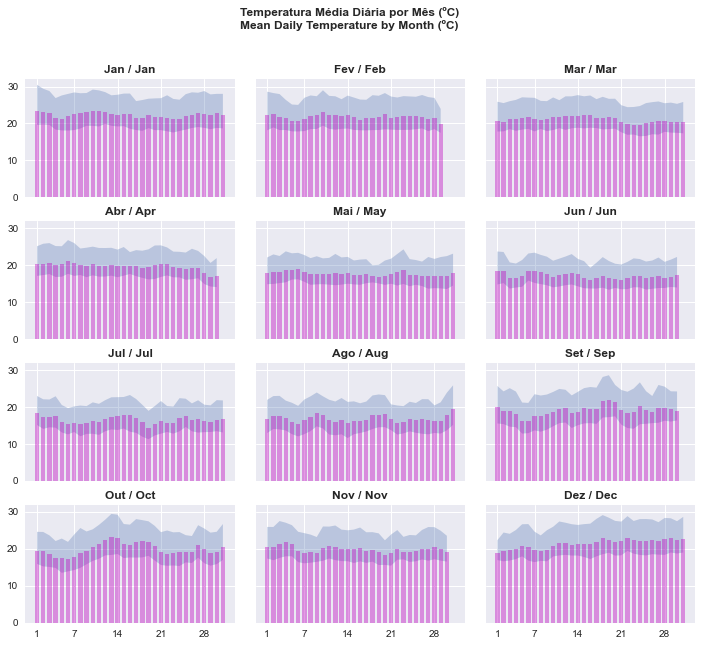

In [18]:
# create the plot figure
fig, axs = plt.subplots(4, 3, sharex=True, sharey=True, figsize=(12,10), gridspec_kw={'hspace':0.2,'wspace':0.1})
fig.suptitle('Temperatura Média Diária por Mês (ºC)\nMean Daily Temperature by Month (ºC)',
             fontweight=900)

# run a loop through axes and months
for ax, m in zip(axs.flatten(), months):
    # select data
    df_plttmp = df_weatherday[df_weatherday['date'].dt.month==months[m]].\
                groupby([df_weatherday['date'].dt.month.rename('month'), df_weatherday['date'].dt.day.rename('day')]).\
                mean().reset_index()

    # create plot
    ax.bar(df_plttmp['day'], df_plttmp['temp_mean'], width=0.7, color='m', alpha=0.4)
    ax.fill_between(df_plttmp['day'], df_plttmp['temp_min'], df_plttmp['temp_max'], alpha=0.3)
    ax.set_title(m, fontweight=550)

# define x-ticks
plt.xticks([1,7,14,21,28], [1,7,14,21,28])

# show plot
plt.show()

Check daily relative humidity variation by month, using bar plot.

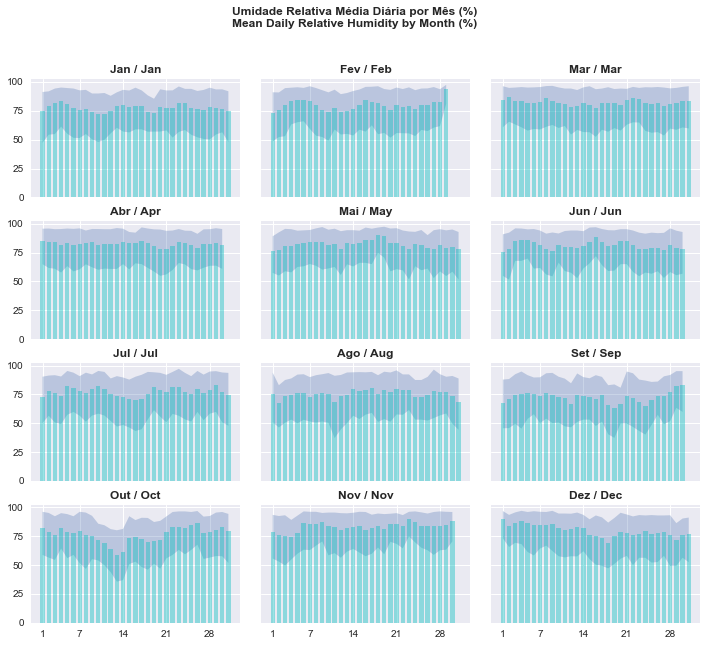

In [19]:
# create the plot figure
fig, axs = plt.subplots(4, 3, sharex=True, sharey=True, figsize=(12,10), gridspec_kw={'hspace':0.2,'wspace':0.1})
fig.suptitle('Umidade Relativa Média Diária por Mês (%)\nMean Daily Relative Humidity by Month (%)',
             fontweight=900)

# run a loop through axes and months
for ax, m in zip(axs.flatten(), months):
    # select data
    df_plttmp = df_weatherday[df_weatherday['date'].dt.month==months[m]].\
                groupby([df_weatherday['date'].dt.month.rename('month'), df_weatherday['date'].dt.day.rename('day')]).\
                mean().reset_index()

    # create plot
    ax.bar(df_plttmp['day'], df_plttmp['rel_humidity_mean'], width=0.7, color='c', alpha=0.4)
    ax.fill_between(df_plttmp['day'], df_plttmp['rel_humidity_min'], df_plttmp['rel_humidity_max'], alpha=0.3)
    ax.set_title(m, fontweight=550)

# define x-ticks
plt.xticks([1,7,14,21,28], [1,7,14,21,28])

# show plot
plt.show()

Check temperature variation between month, using bar plot.

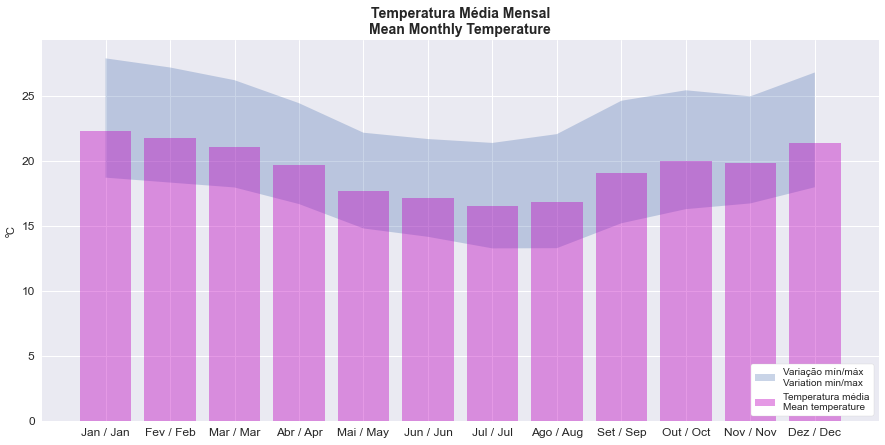

In [20]:
# group data by month
df_plttmp = df_weatherday.groupby(df_weatherday['date'].dt.month.rename('month')).mean().reset_index()

# redefine axis label size
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

# create the plot figure
fig, ax = plt.subplots(figsize=(15,7))

# create plot
ax.bar(df_plttmp['month'], df_plttmp['temp_mean'], width=0.8, color='m', alpha=0.4,
       label='Temperatura média\nMean temperature')
ax.fill_between(df_plttmp['month'], df_plttmp['temp_min'], df_plttmp['temp_max'], alpha=0.3,
                label='Variação mín/máx\nVariation min/max')

# define x-ticks
plt.xticks(df_plttmp['month'].unique(), list(months.keys()))

# define legend
ax.legend(loc=4, frameon=True, facecolor='white', framealpha=1)

# define plot title and axis labels
ax.set_title('Temperatura Média Mensal\nMean Monthly Temperature', {'fontsize':14}, fontweight=900)
ax.set_ylabel('ºC')

# show plot
plt.show()

Check relative humidity variation between month, using bar plot.

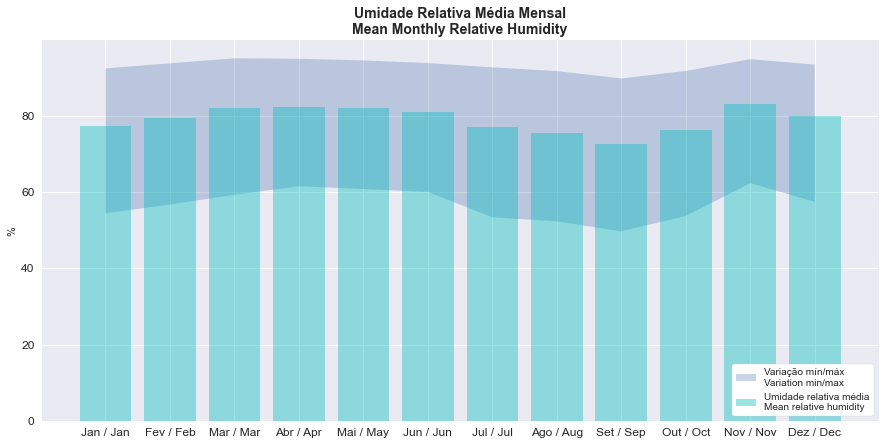

In [21]:
# create the plot figure
fig, ax = plt.subplots(figsize=(15,7))

# create plot
ax.bar(df_plttmp['month'], df_plttmp['rel_humidity_mean'], width=0.8, color='c', alpha=0.4,
       label='Umidade relativa média\nMean relative humidity')
ax.fill_between(df_plttmp['month'], df_plttmp['rel_humidity_min'], df_plttmp['rel_humidity_max'], alpha=0.3,
                label='Variação mín/máx\nVariation min/max')

# define x-ticks
plt.xticks(df_plttmp['month'].unique(), list(months.keys()))

# define legend
ax.legend(loc=4, frameon=True, facecolor='white', framealpha=1)

# define plot title and axis labels
ax.set_title('Umidade Relativa Média Mensal\nMean Monthly Relative Humidity', {'fontsize':14}, fontweight=900)
ax.set_ylabel('%')

# show plot
plt.show()

Create column *year_month* to group data.

In [22]:
# create new column for grouping
df_weatherday['year_month'] = df_weatherday['date'].apply(lambda d: '{:04d}-{:02d}'.format(d.year, d.month))

df_weatherday

,date,temp_mean,temp_min,temp_max,rel_humidity_mean,rel_humidity_min,rel_humidity_max,year_month
0,2014-01-01,24.5,20.7,31.5,72.9,43.0,91.0,2014-01
1,2014-01-02,23.6,18.1,30.0,80.0,51.0,97.0,2014-01
2,2014-01-03,25.7,21.4,31.1,71.6,41.0,91.0,2014-01
3,2014-01-04,25.4,21.4,31.2,70.2,45.0,90.0,2014-01
4,2014-01-05,23.7,20.4,28.5,73.3,41.0,96.0,2014-01
...,...,...,...,...,...,...,...,...
2368,2020-06-26,18.4,14.3,23.7,75.3,56.0,88.0,2020-06
2369,2020-06-27,18.0,14.4,25.0,76.6,35.0,97.0,2020-06
2370,2020-06-28,15.7,12.5,20.7,81.9,57.0,98.0,2020-06
2371,2020-06-29,14.8,13.1,19.0,90.9,72.0,98.0,2020-06


Check temperature for the whole period by month using line plot.

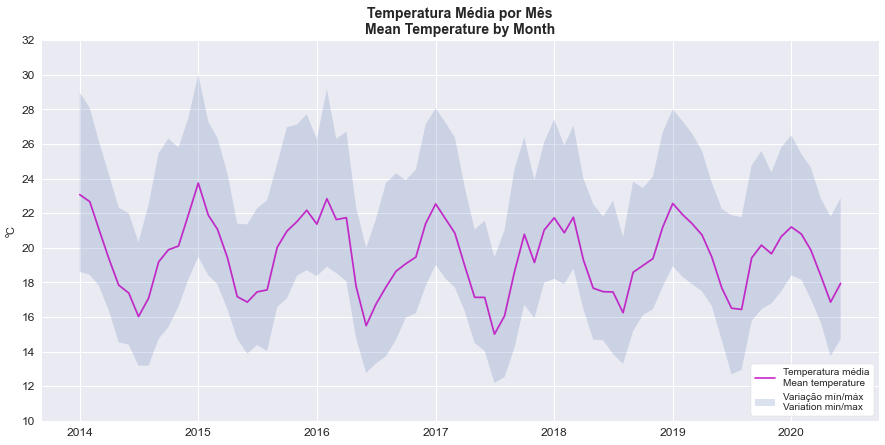

In [23]:
# group data by year_month
df_plttmp = df_weatherday.groupby('year_month').mean().reset_index()

# create the plot figure
fig, ax = plt.subplots(figsize=(15,7))

# create plot
ax.plot(pd.to_datetime(df_plttmp['year_month'], format='%Y-%m'), df_plttmp['temp_mean'], color='m', alpha=0.8,
       label='Temperatura média\nMean temperature')
ax.fill_between(pd.to_datetime(df_plttmp['year_month'], format='%Y-%m'), df_plttmp['temp_min'], df_plttmp['temp_max'], 
                alpha=0.2, label='Variação mín/máx\nVariation min/max')

# define y-ticks
ax.set_yticks(np.arange(10, max(df_plttmp['temp_max'])+2,2))

# define legend
ax.legend(loc=4, frameon=True, facecolor='white', framealpha=1)

# define plot title and axis labels
ax.set_title('Temperatura Média por Mês\nMean Temperature by Month', {'fontsize':14}, fontweight=900)
ax.set_ylabel('ºC')

# show plot
plt.show()

Check relative humidity for the whole period by month using line plot.

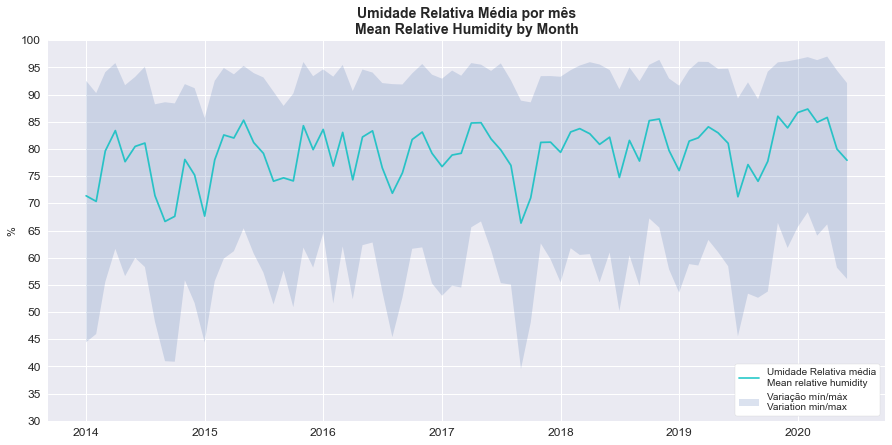

In [24]:
# create the plot figure
fig, ax = plt.subplots(figsize=(15,7))

# create plot
ax.plot(pd.to_datetime(df_plttmp['year_month'], format='%Y-%m'), df_plttmp['rel_humidity_mean'], color='c', alpha=0.8,
       label='Umidade Relativa média\nMean relative humidity')
ax.fill_between(pd.to_datetime(df_plttmp['year_month'], format='%Y-%m'), df_plttmp['rel_humidity_min'], df_plttmp['rel_humidity_max'], 
                alpha=0.2, label='Variação mín/máx\nVariation min/max')

# define y-ticks
ax.set_yticks(np.arange(30, max(df_plttmp['rel_humidity_max'])+5,5))

# define legend
ax.legend(loc=4, frameon=True, facecolor='white', framealpha=1)

# define plot title and axis labels
ax.set_title('Umidade Relativa Média por mês\nMean Relative Humidity by Month', {'fontsize':14}, fontweight=900)
ax.set_ylabel('%')

# show plot
plt.show()

Check the day with the highest temperature recorded in the period.

In [25]:
df_weatherday[df_weatherday['temp_max'] == max(df_weatherday['temp_max'])]

,date,temp_mean,temp_min,temp_max,rel_humidity_mean,rel_humidity_min,rel_humidity_max,year_month
286,2014-10-14,25.7,21.1,35.0,45.2,18.0,69.0,2014-10
291,2014-10-19,25.6,20.0,35.0,57.8,25.0,83.0,2014-10


Check the day with the lowest temperature recorded in the period.

In [26]:
df_weatherday[df_weatherday['temp_min'] == min(df_weatherday['temp_min'])]

,date,temp_mean,temp_min,temp_max,rel_humidity_mean,rel_humidity_min,rel_humidity_max,year_month
894,2016-06-13,10.5,7.2,15.6,75.0,41.0,95.0,2016-06


Check the day with the lowest relative humidity recorded in the period.

In [27]:
df_weatherday[df_weatherday['rel_humidity_min'] == min(df_weatherday['rel_humidity_min'])]

,date,temp_mean,temp_min,temp_max,rel_humidity_mean,rel_humidity_min,rel_humidity_max,year_month
1382,2017-10-14,25.3,20.3,32.1,41.8,17.0,70.0,2017-10


For further analysis data on monthly level and only columns *year_month*, converted to ```datetime``` format and renamed to *period*, *temp_mean* and *rel_humidity_mean* are required. A new dataframe will be created having only required columns grouped by *year_month*.

In [28]:
# create a new dataframe 
features_weather = df_weatherday[['year_month','temp_mean','rel_humidity_mean']].copy()

# group dataframe and reduce decimal positions
features_weather = features_weather.groupby('year_month').mean().reset_index()
features_weather['temp_mean'] = round(features_weather['temp_mean'],1)
features_weather['rel_humidity_mean'] = round(features_weather['rel_humidity_mean'],1)

# rename year_month column
features_weather = features_weather.rename(columns={'year_month':'period'})

# convert period to datetime format
features_weather['period'] = pd.to_datetime(features_weather['period'], format='%Y-%m')

features_weather

,period,temp_mean,rel_humidity_mean
0,2014-01-01,23.1,71.4
1,2014-02-01,22.7,70.4
2,2014-03-01,21.1,79.6
3,2014-04-01,19.4,83.4
4,2014-05-01,17.8,77.7
...,...,...,...
73,2020-02-01,20.8,87.4
74,2020-03-01,19.9,84.9
75,2020-04-01,18.4,85.8
76,2020-05-01,16.9,80.0


Export dataframe to local file in ```feather``` format to be retrieved later on.

In [29]:
# export to feather file format
features_weather.to_feather('./Data_source/Features_Weather.feather')